# Clusterização 

Clusterização é o processo de unir instâncias em clusters (grupos semelhantes por algumas informações)

|Uso|Objetivo|
|:--:|:--:|
|Segmentação de clientes|Agrupar clientes que possuem mesmas rotinas ou gostos de compra. Muito útil em sistemas de recomendação para novos clientes|
|Análise de Dados|Comumente se faz uso de clusterização para poder criar grupos distintos e analisá-los de forma separada, isso traz lucidez e insights valiosos|
|Redução de Dimensionalidade|É possível calcular a afinidade de cada instância com determinado cluster|
|Detecção de Anomalias|Uma instância com baixa afiniadade com qualquer cluster comumente é um outlier ou erro|

Não há uma definição universal do que é um cluster. Isso depende do contexto inserido. Alguns algoritmos buscam as intâncias em torno de pontos centrais chamados de *centroides*, outros já buscam regiões compactadas, esse já pode assumir qualquer forma

## Tipos

### K-Means

O algoritmo **K-Means** une clusters com base em centroides (posição dos pontos centrais) passados. Simples? Bem, até pode parecer, mas não se engane, esse algoritmo prega peças. Vejamos:
</br>
Um dos principais "problemas" do K-Means é que a quantidade de clusters(centroides) precisa ser especificado antes do treinamento. Caso a quantidade de clusters passados esteja errada, conforme a distribuição de seus dados, o modelo poderá criar boundarys repletas de instâncias erradas (invasoras) piorando a aplicabilidade do modelo e acurácia; </br>

#### Atribuíndo a posição dos centróides:

A forma tradicional do K-Means é atribuir a cada instância um único cluster, chamado de *hard clustering*, porém as vezes pode ser interessante atribuir a cada instância um centroide de maior **score** com base na distância do centroide e da instância, a isso chamamos de *soft clustering*

Um bom método de inialização seria iniciar o modelo com centroides posicionados de forma aleatória, rodar o modelo, rotular as instâncias e repetir os passos até que os centroides parem de se mover. Porém esse método pode ter um alto custo computacional e inferir pontos errados.

</br>

Outra forma, então, seria você ter uma noção de onde esses centroides  (depois de rodar um anterior de forma aleatória) e definir o hiperparm *init* como um array e definir *n_init = 1*
```python
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]]) #5 clusters -> 5 posições para o centroide
kmeans = KMeans(n_clusters=5, init = good_init, n_init=1)
```
Outra forma, seria rodar o algoritmo com diversas inicializações aleatórias usando o hiperparm *n_init* como 10, por exemplo. O n_init controla quantas vezes o modelo irá rodar. Depois de finalizado, o modelo irá guardar o melhor modelo que obteve a métrica de ***inércia*** menor (distância quadrada da média de cada instância com o centroide mais próximo), você pode acessar a inércia do seu modelo com *inertia_*

Porém, hoje uma atualização no modelo KMean foi implementada, ele seleciona um centroide aleatório, depois disso ele refaz o processo com um novo centroide e captura a *probabilidade* das instâncias mais próximas e faz uma distribuição de probabilidades de cada e inputa a instância, depois, no centróide mais provável. </br>
Por padrão o KMeans do Sklearn já tem esse método de inicialização, porém pode usar o método original setando *init* como "random", mas isso é bem raro de ocorrer.

- Fórmula:
$$
P(x) = \frac{D(x)^2}{\sum_{x' \in X} D(x')^2}
$$

**Onde:**
- $P(x)$ é a probabilidade de escolher a instância $x$ como o próximo centroide.
- $D(x)$ é a distância da instância $x$ ao centroide mais próximo.
- $X$ é o conjunto de todas as instâncias.

#### Atribuindo o número de clusters

Vale começar explicando que a inércia não é uma boa métrica para definir uma boa quantidade de clusters, visto que a medida que aumentamos o número de clusters a distância da instância do centroide será sempre menor, portanto a inércia sempre será menor.

Um bom método, famoso, é ver o clusters que se encontra no ***"elbow"*** em um gráfico $(y)$ sendo a inércia e $(x)$ o número de clusters. Onde o clusters se encontrar em um ponto mais parecido com um cotovelo, é provável que seja uma boa quantidade.

Contudo, há uma forma um pouco mais sofisticada para a escolha, chamamos de ***silhouette score***. O Silhouette de uma instância se dá por $(b - a) / max(a,b)$ em que $a$ é a distância média para as outras instâncias no mesmo cluster (distância intracluster) e $b$ é a distância média do clusters mais próximo. O coeficiente varia de +1 a -1, sendo +1 significando que a instância está dentro de seu cluster, 0 que está na fronteira e -1 que está fora de seu cluster.

O cálculo do coef pode ser feito pela Sklearn com 
 ```python
 from sklearn.metrics import silhouette_score
 silhouette_score(X, kmeans.labels_)
 ```

 - #### Limites do KMeans

O principal problema do KMeans é que ele não se dá bem em datasets com clusters de formas muitos distâncias de esferas ou densidades variadas.


## Dicas :

Escalone seus dados, se preciso e se atente a outliers, por ser um algoritmo de distância, essas duas variáveis podem influenciar muito o modelo



In [56]:
import warnings

# Suprimir avisos
warnings.filterwarnings("ignore")

In [70]:
from sklearn.cluster import KMeans
import pandas as pd
data = {
    'Feature_1': [1.0, 1.5, 3.0, 5.0, 3.5, 4.5, 3.5],
    'Feature_2': [1.0, 2.0, 4.0, 7.0, 5.0, 5.0, 4.5]
}

df = pd.DataFrame(data)
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)
kmeans.labels_

array([1, 1, 2, 0, 2, 2, 2])

In [71]:
df['Cluster'] = kmeans.labels_

In [72]:
df

,Feature_1,Feature_2,Cluster
0,1.0,1.0,1
1,1.5,2.0,1
2,3.0,4.0,2
3,5.0,7.0,0
4,3.5,5.0,2
5,4.5,5.0,2
6,3.5,4.5,2


In [73]:
kmeans.cluster_centers_

array([[5.   , 7.   ],
       [1.25 , 1.5  ],
       [3.625, 4.625]])

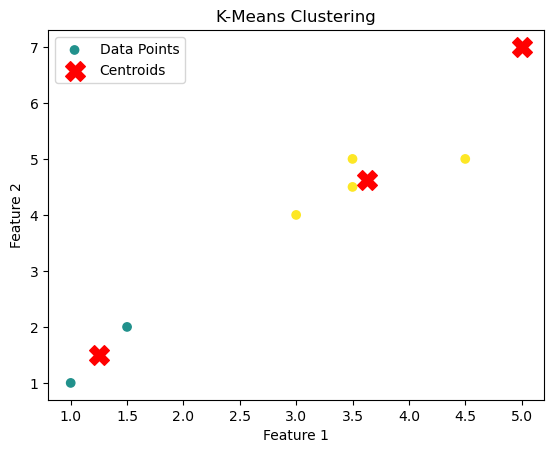

In [75]:
import matplotlib.pyplot as plt
plt.scatter(df['Feature_1'], df['Feature_2'], c=df['Cluster'], cmap='viridis', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [76]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [77]:
kmeans.cluster_centers_

array([[5.   , 7.   ],
       [1.25 , 1.5  ],
       [3.625, 4.625]])

Encontrando uma boma quantidade de cluster pelo méotodo Elbow

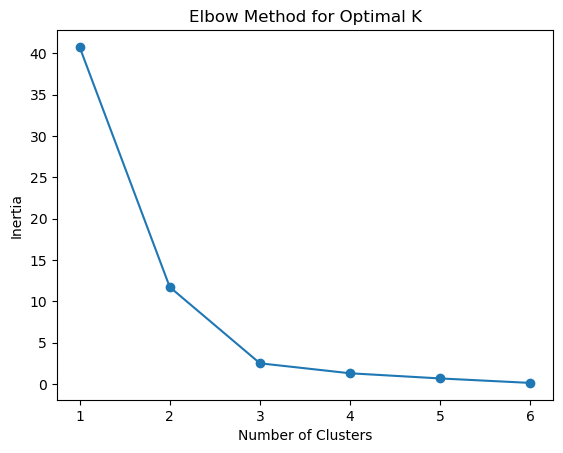

In [78]:
inertia = []

for n in range(1, 7):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 7), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [79]:
from sklearn.metrics import silhouette_score
silhouette_score(df, kmeans.labels_) #score com 3 clusters (nosso valor inicial)

0.11327045983049322

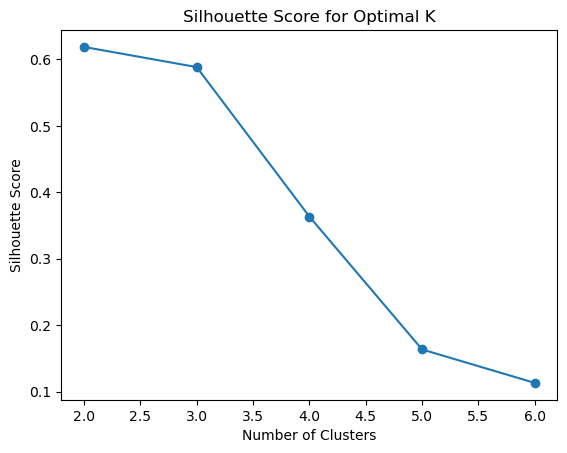

In [80]:
# Lista para armazenar os Silhouette Scores
silhouette_scores = []

# Número máximo de clusters deve ser no máximo o número de amostras - 1
max_clusters = min(len(df) - 1, 7)

# Testar KMeans com diferentes números de clusters (de 2 até max_clusters)
for n in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n, random_state=0)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

# Plotar o gráfico do Silhouette Score
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [81]:
#Treinando modelo com Clusters = 2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df)
silhouette_score(df, kmeans.labels_)

0.32281684043174363

## KMeans para Pre-processing

In [33]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

0.9622222222222222

Pre-processando com KMeans e verificando a accuracy com modelo com clusters definidos

In [49]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression())
])

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9622222222222222

Usando GridSearch para encontrar a melhor quantidade de clusters para se usar

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100)) #setando um range de valores para se usar no param n_clusters do kmeans (nome dado ao modelo no pipeline)
grid_clf = GridSearchCV(pipe, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)
grid_clf.best_params_

Fitting 3 folds for each of 98 candidates, totalling 294 fits


{'kmeans__n_clusters': 54}

In [51]:
grid_clf.score(X_test, y_test)

0.96